# plot

## single file 

In [30]:
#import src and load single file into data
fdir = ['../data/Heisenberg{Float64}(1.0, 1.0, 1.0)/']

%matplotlib notebook
# %matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style(theme='chesterish')

import matplotlib.pyplot as plt
import os  
import numpy as np 
from itertools import groupby
import re
import pandas as pd
import numpy as np

feature = ('D', 'chi','maxiter','tol','time','ener','gradnorm')

def file_name(file_dir):   
    L=[]   
    for root, dirs, files in os.walk(file_dir):  
        for file in files:  
            if os.path.splitext(file)[1] == '.log':  
                # L.append(os.path.join(root, file))  
                file_name = file[:]  #去掉.txt
                L.append(file_dir+file_name)  
    return L

def parse(f):
    D = int(re.search('D([0-9]*)_chi', f).group(1))
    chi = int(re.search('chi([0-9]*)_tol', f).group(1))
    maxiter = int(re.search('maxiter([0-9]*).log', f).group(1))
    tol = float(re.search('tol(-?[1-9](?:\.\d+)?[Ee][-+]?\d+)_maxiter', f).group(1))
    return D, chi, maxiter, tol

def keyfunc(f):
    D, chi, maxiter, tol= parse(f)
    return D, chi, maxiter, tol

def get_min_ener(x):
    df = x.sort_values(by = 'ener',ascending=True)
    return df.iloc[0,:]

for file_dir in fdir:
    txt_name = file_name(file_dir)
    data = pd.DataFrame(columns=feature)
    files = [list(l) for k, l in groupby(sorted(txt_name, key=keyfunc), keyfunc)]
    print(len(files))

    # markers = ['o', 's', 'D', '*', 'x', '^', '<', 'h']
    # colors = ['C2', 'C1','C0', 'C3', 'C4', 'C5', 'C6', 'C7']
    # for fg, marker, color in zip(files, markers, colors):
    xlist = []
    ylist = []
    for fg in files:
        for f in fg:
            D, chi, maxiter, tol = parse(f)
#             if (D != 2): break
#             if (chi < 40): break
#             if (T > 4.52): break
            time, epoch, ener, gradnorm = np.loadtxt(f, unpack=True)
            if type(epoch) == np.ndarray:
                for i in range(len(epoch)):
                    datarow = pd.DataFrame([[D, chi, maxiter, tol, time[i], ener[i], gradnorm[i]]],columns=feature)
                    data = data.append(datarow,ignore_index=True)
            else:
                datarow = pd.DataFrame([[D, chi, maxiter, tol, time, ener, gradnorm]],columns=feature)
                data = data.append(datarow,ignore_index=True)

1


### observable 

<IPython.core.display.Javascript object>


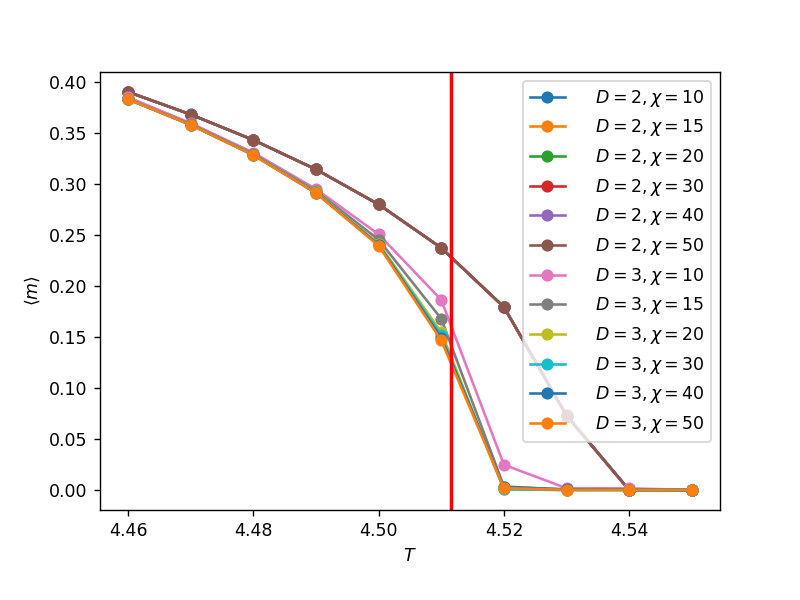

In [3]:
# observable best data
obs = 'mag'

bestdata = data.groupby(['D','chi','T'],as_index=False).apply(get_min_lnZ)
for D in [2,3,4]:
    for chi in [10,15,20,30,40,50]:
        datar = bestdata.loc[bestdata['D']==D].loc[bestdata['chi']==chi]
        if len(datar) != 0:
            plt.plot(datar['T'], datar[obs],'-o',label='   $D=%g,\chi=%g$' \
                             %(D, datar['chi'][0:1]))
plt.axvline(x=4.511527, color='r', lw=2)
plt.xlabel(r'$T$')
if obs == 'mag':
    plt.ylabel(r'$	\left \langlem\right \rangle$')
elif obs == 'lnZ':
    plt.ylabel('lnZ')
    plt.subplots_adjust(left=0.15)
elif obs == 'gradnorm':
    plt.ylabel('gradnorm')
    plt.yscale('log')
else:
    print ('which obs ?')
    sys.exit(1)
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.show()

In [4]:
# observable best data
obs = 'xi'

bestdata = data.groupby(['D','chi','T'],as_index=False).apply(get_min_lnZ)
for D in [2,3,4]:
    for chi in [10,15,20,30,40,50]:
        datar = bestdata.loc[bestdata['D']==D].loc[bestdata['chi']==chi]
        if len(datar) != 0:
            plt.plot(datar['T'], datar[obs],'-o',label='   $D=%g,\chi=%g$' \
                             %(D, datar['chi'][0:1]))
plt.axvline(x=4.511527, color='r', lw=2)
plt.xlabel(r'$T$')
if obs == 'mag':
    plt.ylabel('magnetization')
elif obs == 'lnZ':
    plt.ylabel('lnZ')
    plt.subplots_adjust(left=0.15)
elif obs == 'gradnorm':
    plt.ylabel('gradnorm')
    plt.yscale('log')
elif obs == 'xi':
    plt.ylabel(r'$\xi$')
else:
    print ('which obs ?')
    sys.exit(1)
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


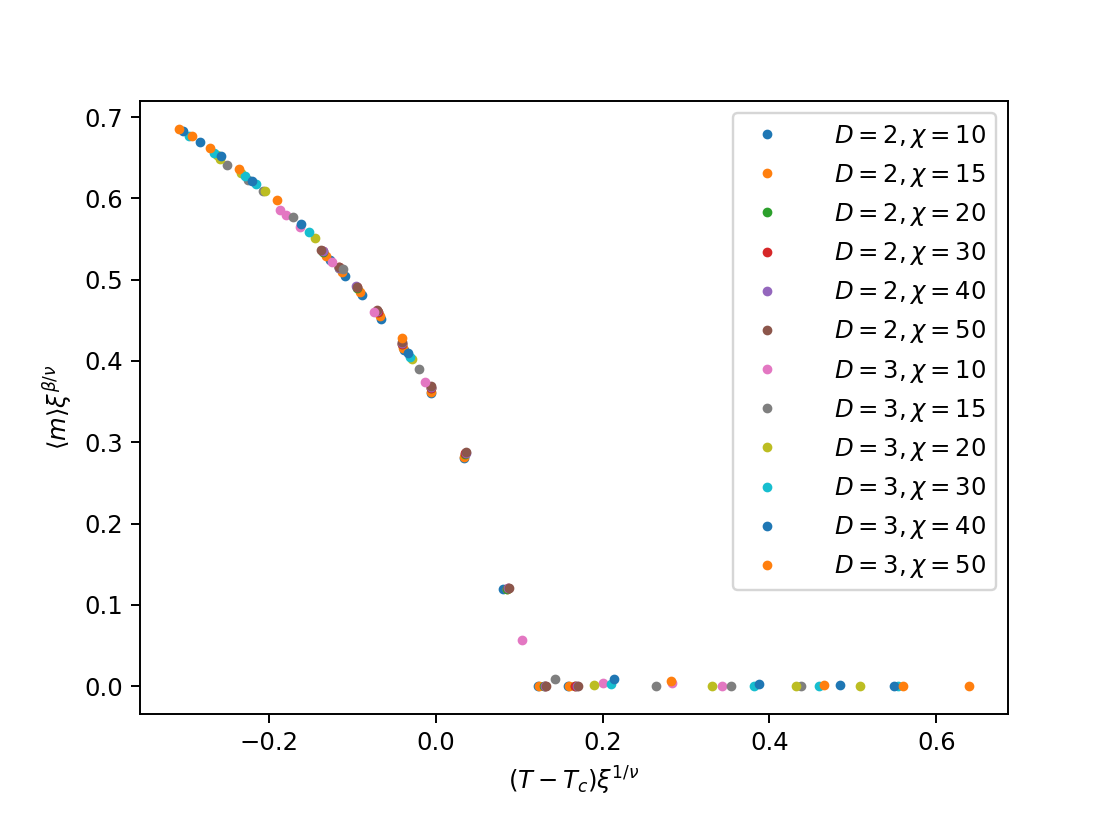

In [170]:
# data collapse

obs = 'mag'

beta = 0.326419
nu = 0.629971
Tc = 4.511528

bestdata = data.groupby(['D','chi','T'],as_index=False).apply(get_min_lnZ)
for D in [2,3,4]:
    for chi in [10,15,20,30,40,50]:
        datar = bestdata.loc[bestdata['D']==D].loc[bestdata['chi']==chi]
        if len(datar) != 0:
            plt.plot((datar['T']-Tc)*datar['xi']**(1/nu), datar[obs]*datar['xi']**(beta/nu),'.',label='   $D=%g,\chi=%g$' \
                             %(D, datar['chi'][-1]))
# plt.axvline(x=4.511527, color='r', lw=2)
plt.xlabel(r'$(T-T_c)\xi^{1/\nu}$')
plt.ylabel(r'$	\left \langlem\right \rangle\xi^{\beta/\nu}$')

plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>


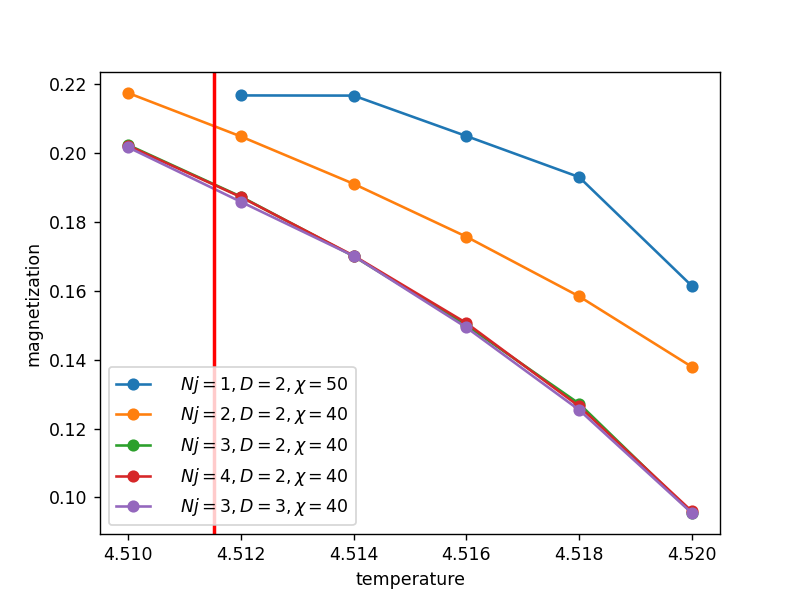

In [27]:
# Nj observable best data
obs = 'mag'

bestdata = data.groupby(['D','Nj','T'],as_index=False).apply(get_min_lnZ)
for D in [2,3]:
    for Nj in [1,2,3,4]:
#         for chi in [40]:
            datar = bestdata.loc[(bestdata['D']==D) & (bestdata['Nj']==Nj)]
            if datar.empty != True:
                plt.plot(datar['T'], datar[obs],'-o',label='   $Nj=%g,D=%g,\chi=%g$' \
                                 %(Nj, datar['D'][-1], datar['chi'][-1]))
plt.axvline(x=4.511527, color='r', lw=2)
plt.xlabel('temperature')
if obs == 'mag':
    plt.ylabel('magnetization')
elif obs == 'lnZ':
    plt.ylabel('lnZ')
    plt.subplots_adjust(left=0.15)
elif obs == 'gradnorm':
    plt.ylabel('gradnorm')
    plt.yscale('log')
else:
    print ('which obs ?')
    sys.exit(1)
plt.legend()
plt.show()

In [ ]:
0 -0.7774378149215729 1.1031219956067436e-6 28.235330769466092 -0.09016006200116644

### gradient descent

<IPython.core.display.Javascript object>


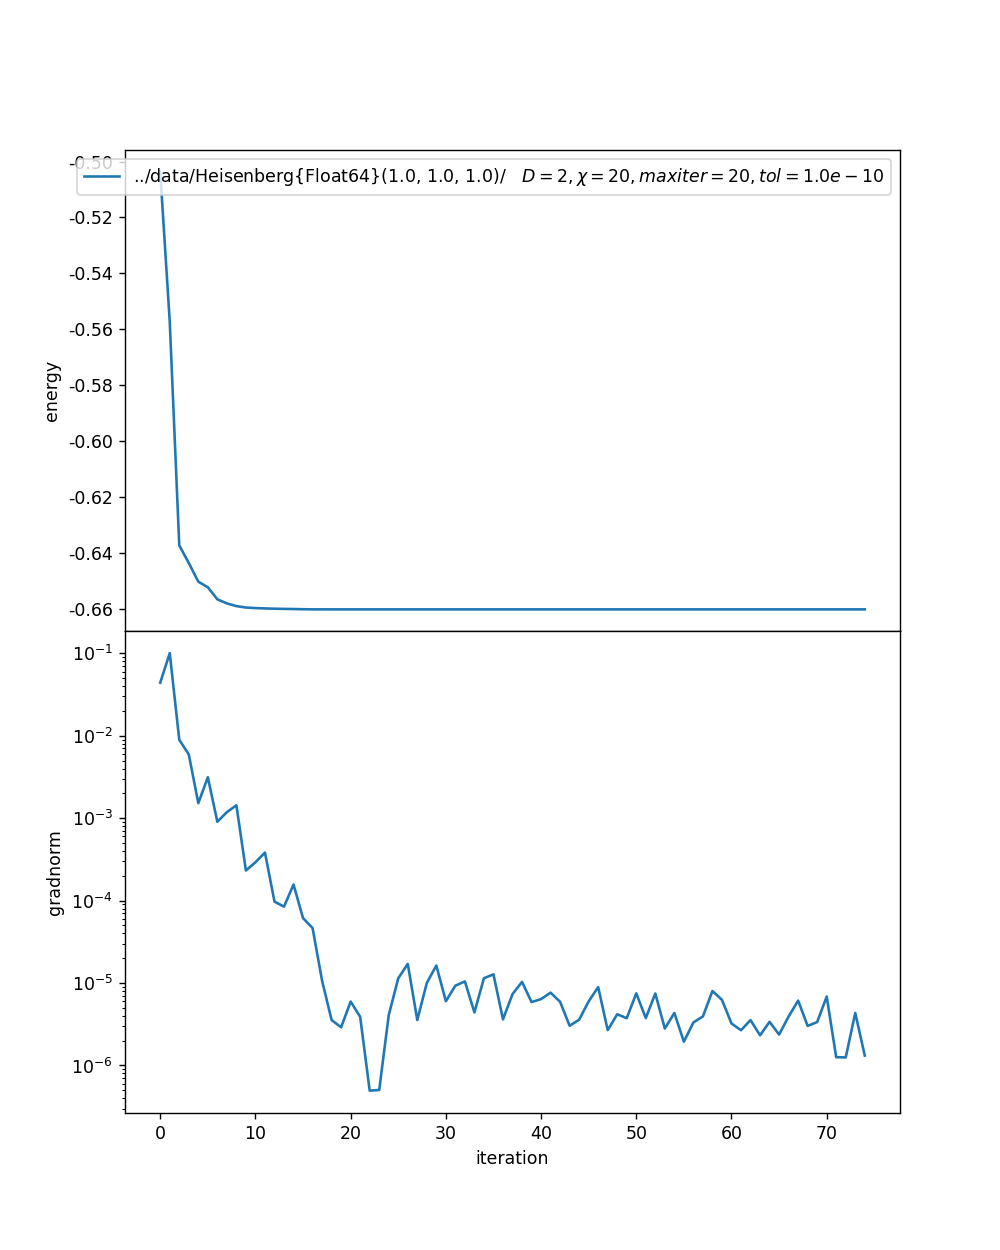

In [34]:
# descent best data
obss = ['ener','gradnorm']
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True)
for i in range(2):
    obs = obss[i]
    axis=ax[i]
    datadescend = data.loc[data['D']==2].loc[data['chi']==20]
    axis.plot(list(range(datadescend.shape[0]))[0:datadescend.shape[0]], datadescend[obs][0:datadescend.shape[0]],\
             '-', \
             label=file_dir+'   $D=%g,\chi=%g,maxiter=%g,tol=%.1e$' \
             %(D, chi, maxiter, tol))
    axis.set_xlabel('iteration')
    if obs == 'ener':
        axis.set_ylabel('energy')
        axis.legend(loc='upper right')
    elif obs == 'gradnorm':
        axis.set_ylabel('gradnorm')
        axis.set_yscale('log')
        plt.rcParams['axes.unicode_minus'] = False
    else:
        print ('which obs ?')
        sys.exit(1)

fig.subplots_adjust(hspace=0)
fig.set_size_inches(8, 10)
plt.show()

## muti file

### observable

51


<IPython.core.display.Javascript object>


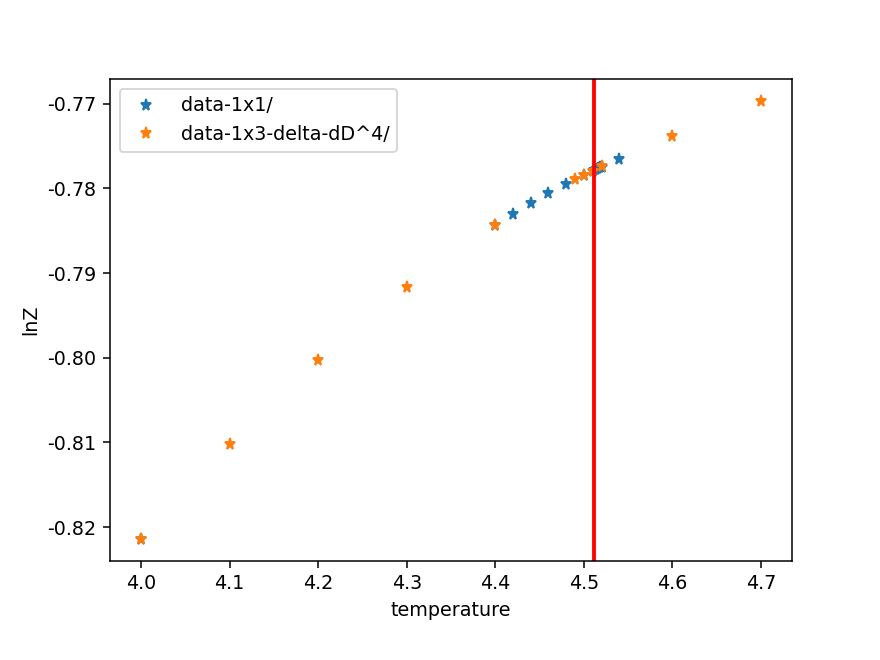

30


In [19]:
# muti file best data observarble
obs = 'lnZ'
fdir = ['data-1x1/','data-1x3-delta-dD^4/']
%matplotlib notebook
# %matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style(theme='chesterish')

import matplotlib.pyplot as plt
import os  
import numpy as np 
from itertools import groupby
import re
import pandas as pd
import numpy as np

feature = ('T','D', 'chi','maxiter','tol','lnZ','gradnorm','mag')

def file_name(file_dir):   
    L=[]   
    for root, dirs, files in os.walk(file_dir):  
        for file in files:  
            if os.path.splitext(file)[1] == '.log':  
                # L.append(os.path.join(root, file))  
                file_name = file[:]  #去掉.txt
                L.append(file_dir+file_name)  
    return L

def parse(f):
    D = int(re.search('D([0-9]*)_chi', f).group(1))
    chi = int(re.search('chi([0-9]*)_tol', f).group(1))
    maxiter = int(re.search('maxiter([0-9]*).log', f).group(1))
    tol = float(re.search('tol(-?[1-9](?:\.\d+)?[Ee][-+]?\d+)_maxiter', f).group(1))
    T = float(re.search('T([0-9]*\.?[0-9]*)_D', f).group(1))
    return T, D, chi, maxiter, tol

def keyfunc(f):
    T, D, chi, maxiter, tol= parse(f)
    return D, T, chi, maxiter, tol

def get_min_lnZ(x):
    df = x.sort_values(by = 'lnZ',ascending=True)
    return df.iloc[0,:]

for file_dir in fdir:
    txt_name = file_name(file_dir)
    data = pd.DataFrame(columns=feature)
    files = [list(l) for k, l in groupby(sorted(txt_name, key=keyfunc), keyfunc)]
    print(len(files))

    # markers = ['o', 's', 'D', '*', 'x', '^', '<', 'h']
    # colors = ['C2', 'C1','C0', 'C3', 'C4', 'C5', 'C6', 'C7']
    # for fg, marker, color in zip(files, markers, colors):
    xlist = []
    ylist = []
    for fg in files:
        for f in fg:
            T, D, chi, maxiter, tol = parse(f)
#             if (D != 2): break
#             if (T < 4.4): break
#             if (T > 4.55): break
            epoch, lnZ, gradnorm, _, mag = np.loadtxt(f, unpack=True)
            for i in range(len(epoch)):
                datarow = pd.DataFrame([[T, D, chi, maxiter, tol,lnZ[i], gradnorm[i],abs(mag[i])]],columns=feature)
                data = data.append(datarow,ignore_index=True)

    #     plt.plot(xlist, ylist, marker, color=color, markerfacecolor='none', markeredgewidth=2, ms=8, label='$D=%g,\chi=%g,maxiter=%g,tol=%.1e$'%(D, chi, maxiter, tol))
    #     plt.plot(xlist, ylist ,marker, label='$D=%g,\chi=%g,maxiter=%g,tol=%.1e$'%(D, chi, maxiter, tol))
    bestdata = data.groupby('T',as_index=False).apply(get_min_lnZ)
    plt.plot(bestdata['T'], bestdata[obs],'*',label=file_dir)
#     for T in bestdata['T']:
#         datar = bestdata.loc[bestdata['T']==T]
#         plt.plot(datar['T'], datar[obs],'*',label=file_dir+'   $T=%.3f,D=%g,\chi=%g$' \
#                          %(datar['T'],datar['D'], datar['chi']))
#     for D in [2,3,4,5]:
#         Ddata = data.loc[data['D']==D]
#         plt.plot(Ddata['T'], Ddata[obs],'.',label=file_dir+'  $D=%d$'%(D))

    
plt.axvline(x=4.511527, color='r', lw=2)
plt.xlabel('temperature')
if obs == 'mag':
    plt.ylabel('magnetization')
elif obs == 'lnZ':
    plt.ylabel('lnZ')
elif obs == 'gradnorm':
    plt.ylabel('gradnorm')
    plt.yscale('log')
else:
    print ('which obs ?')
    sys.exit(1)
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.show()

### gradient descent

In [47]:
#muti file best data gradient descent
obss = ['ener','gradnorm']
fdir = ['../data/ADVUMPS_Heisenberg(1.0,1.0,1.0)/','../data/ADCTMRG_Heisenberg(1.0,1.0,1.0)/']
%matplotlib notebook
# %matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style(theme='chesterish')

import matplotlib.pyplot as plt
import os  
import numpy as np 
from itertools import groupby
import re
import pandas as pd
import numpy as np

feature = ('D', 'chi','maxiter','tol','time','ener','gradnorm')

def file_name(file_dir):   
    L=[]   
    for root, dirs, files in os.walk(file_dir):  
        for file in files:  
            if os.path.splitext(file)[1] == '.log':  
                # L.append(os.path.join(root, file))  
                file_name = file[:]  #去掉.txt
                L.append(file_dir+file_name)  
    return L

def parse(f):
    D = int(re.search('D([0-9]*)_chi', f).group(1))
    chi = int(re.search('chi([0-9]*)_tol', f).group(1))
    maxiter = int(re.search('maxiter([0-9]*).log', f).group(1))
    tol = float(re.search('tol(-?[1-9](?:\.\d+)?[Ee][-+]?\d+)_maxiter', f).group(1))
    return D, chi, maxiter, tol

def keyfunc(f):
    D, chi, maxiter, tol= parse(f)
    return D, chi, maxiter, tol

def get_min_ener(x):
    df = x.sort_values(by = 'ener',ascending=True)
    return df.iloc[0,:]

fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True)
for file_dir in fdir:
    txt_name = file_name(file_dir)
    data = pd.DataFrame(columns=feature)
    files = [list(l) for k, l in groupby(sorted(txt_name, key=keyfunc), keyfunc)]
    print(len(files))

    # markers = ['o', 's', 'D', '*', 'x', '^', '<', 'h']
    # colors = ['C2', 'C1','C0', 'C3', 'C4', 'C5', 'C6', 'C7']
    # for fg, marker, color in zip(files, markers, colors):
    xlist = []
    ylist = []
    for fg in files:
        for f in fg:
            D, chi, maxiter, tol = parse(f)
#             if (D != 2): break
#             if (chi < 40): break
#             if (T > 4.52): break
            time, epoch, ener, gradnorm = np.loadtxt(f, unpack=True)
            if type(epoch) == np.ndarray:
                for i in range(len(epoch)):
                    datarow = pd.DataFrame([[D, chi, maxiter, tol, time[i], ener[i], gradnorm[i]]],columns=feature)
                    data = data.append(datarow,ignore_index=True)
            else:
                datarow = pd.DataFrame([[D, chi, maxiter, tol, time, ener, gradnorm]],columns=feature)
                data = data.append(datarow,ignore_index=True)
                
    for i in range(2):
        obs = obss[i]
        axis=ax[i]
        datadescend = data.loc[data['D']==2].loc[data['chi']==20]
        axis.plot(list(range(datadescend.shape[0]))[0:datadescend.shape[0]], datadescend[obs][0:datadescend.shape[0]],\
                 '-', \
                 label=file_dir)
        axis.set_xlabel('iteration')
        if obs == 'ener':
            axis.set_ylabel('energy')
            axis.legend(loc='upper right')
        elif obs == 'gradnorm':
            axis.set_ylabel('gradnorm')
            axis.set_yscale('log')
            plt.rcParams['axes.unicode_minus'] = False
        else:
            print ('which obs ?')
            sys.exit(1)

    fig.subplots_adjust(hspace=0)
    fig.set_size_inches(8, 12)
    plt.show()

<IPython.core.display.Javascript object>

1
1
